### 4_Assignment

For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.

Use the data to complete the following tasks:
* Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the "date" column.
* Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.
* Create a `draw_line_plot` function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be "plt.x". The label on the x axis should be "Date" and the label on the y axis should be "Page Views".
* Create a `draw_bar_plot` function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of "Months". On the chart, the label on the x axis should be "Years" and the label on the y axis should be "Average Page Views".
* Create a `draw_box_plot` function that uses Searborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be "Year-wise Box Plot (Trend)" and the title of the second chart should be "Month-wise Box Plot (Seasonality)". Make sure the month labels on bottom start at "Jan" and the x and x axis are labeled correctly.

For each chart, make sure to use a copy of the data frame.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [3]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.)
df = pd.read_csv('fcc-forum-pageviews.csv')
df = df.set_index('date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [4]:
# Clean data
df = df[(df["value"] > df["value"].quantile(.025)) & (df["value"] < df["value"].quantile(.975))]
df.index = pd.to_datetime(df.index)
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


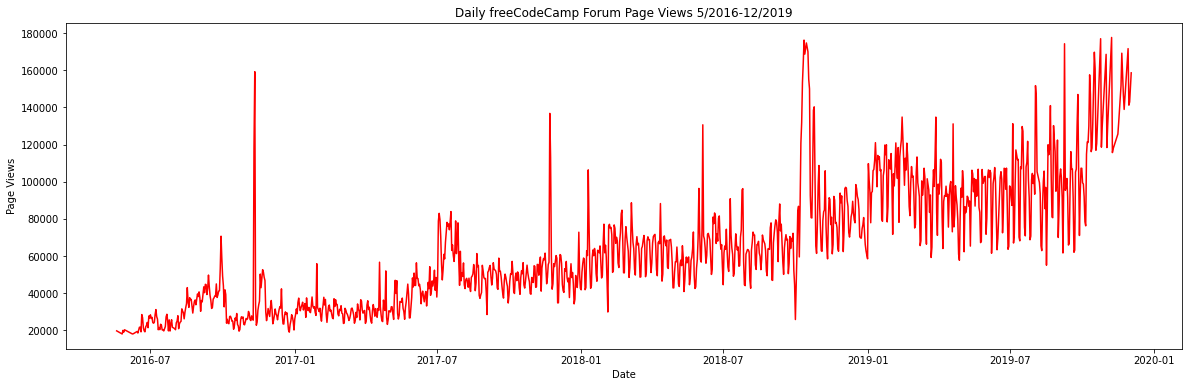

In [5]:
# Draw line plot
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column
# https://stackoverflow.com/questions/43538396/python-how-can-i-change-the-x-axis-interval-to-show-12-months-using-matplotlib
# gca - get current axis, gcf - figure
fig = plt.figure(figsize=(20,6))
plt.plot(df.index,df["value"],color="r")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019", color = "black")
plt.xlabel("Date",color = "black")
plt.ylabel("Page Views",color = "black")
plt.show()


In [6]:
# Save image and return fig (don't change this part)
fig.savefig('line_plot.png')

In [46]:
# df.sort_values(["b", "c"], ascending = (False, True))
# Copy and modify data for monthly bar plot
df_bar = df.copy()
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_order_3char = [month[:3] for month in month_order]
df_bar["year"] = pd.DatetimeIndex(df_bar.index).year
df_bar["month"] = pd.DatetimeIndex(df_bar.index).month_name()
# convert to month name here will complicate later process
# also month now will be sort by alphabet and difficult to sort back to correct order, the plot with month name will also be mess up with correct order
df_sum = df_bar.groupby(["year","month"])["value"].mean()
df_sum

year  month    
2016  August        31049.193548
      December      27832.419355
      July          24109.678571
      June          21875.105263
      May           19432.400000
      November      40448.633333
      October       27398.322581
      September     41476.866667
2017  April         30878.733333
      August        47712.451613
      December      48420.580645
      February      31113.071429
      January       32785.161290
      July          65806.838710
      June          43577.500000
      March         29369.096774
      May           34244.290323
      November      57701.566667
      October       47438.709677
      September     47376.800000
2018  April         62350.833333
      August        62831.612903
      December      80047.483871
      February      65679.000000
      January       58580.096774
      July          63591.064516
      June          70117.000000
      March         62693.774194
      May           56562.870968
      November      78688.3

In [47]:
month_order_3char

['Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun',
 'Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec']

In [8]:
df_bar["month2"] = pd.DatetimeIndex(df_bar.index).month
# convert to month name here will complicate later process
df_sumNum = df_bar.groupby(["year","month2"])["value"].mean()
df_sumNum

year  month2
2016  5          19432.400000
      6          21875.105263
      7          24109.678571
      8          31049.193548
      9          41476.866667
      10         27398.322581
      11         40448.633333
      12         27832.419355
2017  1          32785.161290
      2          31113.071429
      3          29369.096774
      4          30878.733333
      5          34244.290323
      6          43577.500000
      7          65806.838710
      8          47712.451613
      9          47376.800000
      10         47438.709677
      11         57701.566667
      12         48420.580645
2018  1          58580.096774
      2          65679.000000
      3          62693.774194
      4          62350.833333
      5          56562.870968
      6          70117.000000
      7          63591.064516
      8          62831.612903
      9          65941.733333
      10        111378.142857
      11         78688.333333
      12         80047.483871
2019  1         102056.5161

In [9]:
df_sns = df_sum.reset_index()
# df_sns.sort_values(["year", "month"], by="month")
# print('df_sns:\n', df_sns)



In [10]:
df_plt = df_sum.unstack()
df_plt_NaN = df_plt[month_order]
print('df_plt_NaN:\n', df_plt_NaN)
print('df_plt:\n', df_plt)
# This will also generate NaN data in missing month, not recommend

df_plt_NaN:
 month        January       February         March         April           May  \
year                                                                            
2016             NaN            NaN           NaN           NaN  19432.400000   
2017    32785.161290   31113.071429  29369.096774  30878.733333  34244.290323   
2018    58580.096774   65679.000000  62693.774194  62350.833333  56562.870968   
2019   102056.516129  105968.357143  91214.483871  89368.433333  91439.903226   

month          June          July         August     September        October  \
year                                                                            
2016   21875.105263  24109.678571   31049.193548  41476.866667   27398.322581   
2017   43577.500000  65806.838710   47712.451613  47376.800000   47438.709677   
2018   70117.000000  63591.064516   62831.612903  65941.733333  111378.142857   
2019   90435.642857  97236.566667  102717.310345  97268.833333  122802.272727   

month       N

<Figure size 720x720 with 0 Axes>

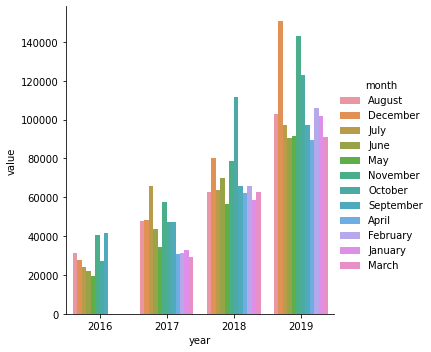

In [11]:
# Draw bar plot
# Using matplotlib with unstack
# fig = df_sum.plot(kind ="bar", legend = True, figsize = (15,10)).figure

fig = plt.figure(figsize=(10, 10))
sns.catplot(data=df_sns, kind="bar",  x="year",y= "value",hue="month")

In [12]:
# https://stackoverflow.com/questions/48283596/multi-index-series-into-pandas-dataframe
# df_sumNum.reset_index(inplace=True)
# inplace true get error
df_sumNum3 = df_sumNum.reset_index()
# sns.catplot(data=df_sumNum3, kind="bar",  x="year",y= "value",hue="month2")
df_sumNum3 


,year,month2,value
0,2016,5,19432.400000
1,2016,6,21875.105263
2,2016,7,24109.678571
3,2016,8,31049.193548
4,2016,9,41476.866667
5,2016,10,27398.322581
6,2016,11,40448.633333
7,2016,12,27832.419355
8,2017,1,32785.161290
9,2017,2,31113.071429


<AxesSubplot:xlabel='year', ylabel='value'>

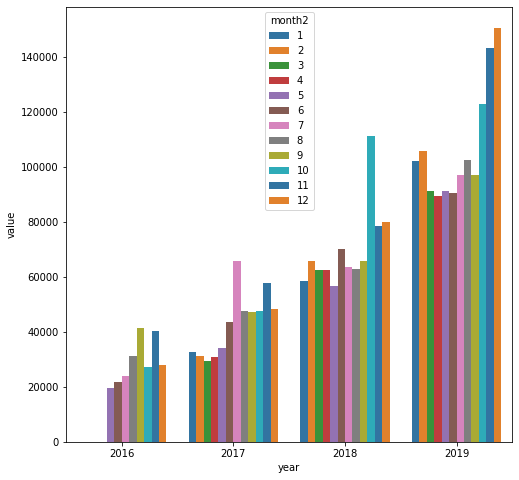

In [13]:
plt.figure(figsize=(8, 8))
sns.barplot(data=df_sumNum3,  x="year",y= "value",hue="month2" , palette=sns.color_palette())

In [14]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

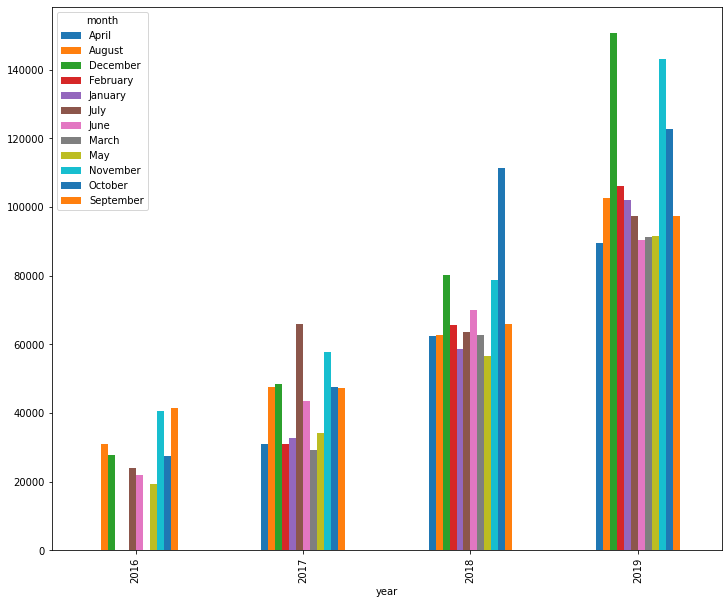

In [15]:

fig=df_plt.plot(kind ="bar", legend = True, figsize = (12,10)).figure

In [16]:
# Save image and return fig (don't change this part)
fig.savefig('bar_plot.png')

In [19]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box


,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


In [25]:
df_box["month"].describe()

count     1238
unique      12
top        Aug
freq       122
Name: month, dtype: object

[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Year-wise Box Plot (Trend)')]

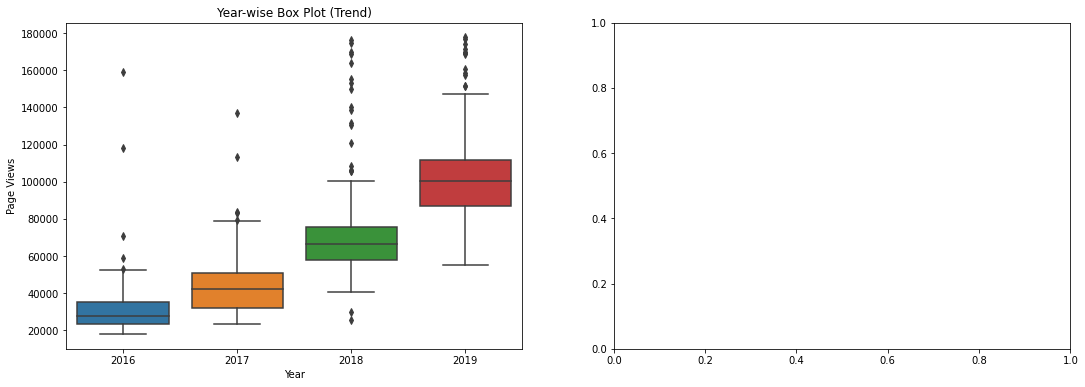

In [57]:
# Draw box plots (using Seaborn)
fig, axarr = plt.subplots(1, 2, figsize=(18, 6))
# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.set_figwidth(20)
# fig.set_figheight(10)
# sns.boxplot(ax=axarr[0], x="year", y="value", data=df_box)
# sns.boxplot(ax=axarr[1], x="month", y="value", data=df_box, order=month_order_3char)
# axarr[0].set_title("Year-wise Box Plot (Trend)")
# axarr[0].set_xlabel("Year")
# axarr[0].set_ylabel("Page Views")
# axarr[1].set_xlabel("Month")
# axarr[1].set_ylabel("Page Views")
# axarr[1].set_title("Month-wise Box Plot (Seasonality)")
# sns.boxplot(x = df_box['year'], y = df_box['value'], ax = axarr[0]).set(xlabel='Year', ylabel='Page Views', title = "Year-wise Box Plot (Trend)")

In [ ]:
# Save image and return fig (don't change this part)
fig.savefig('box_plot.png')